In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel("AirQualityUCI.xlsx")

In [4]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [5]:
data.shape

(9357, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
data.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


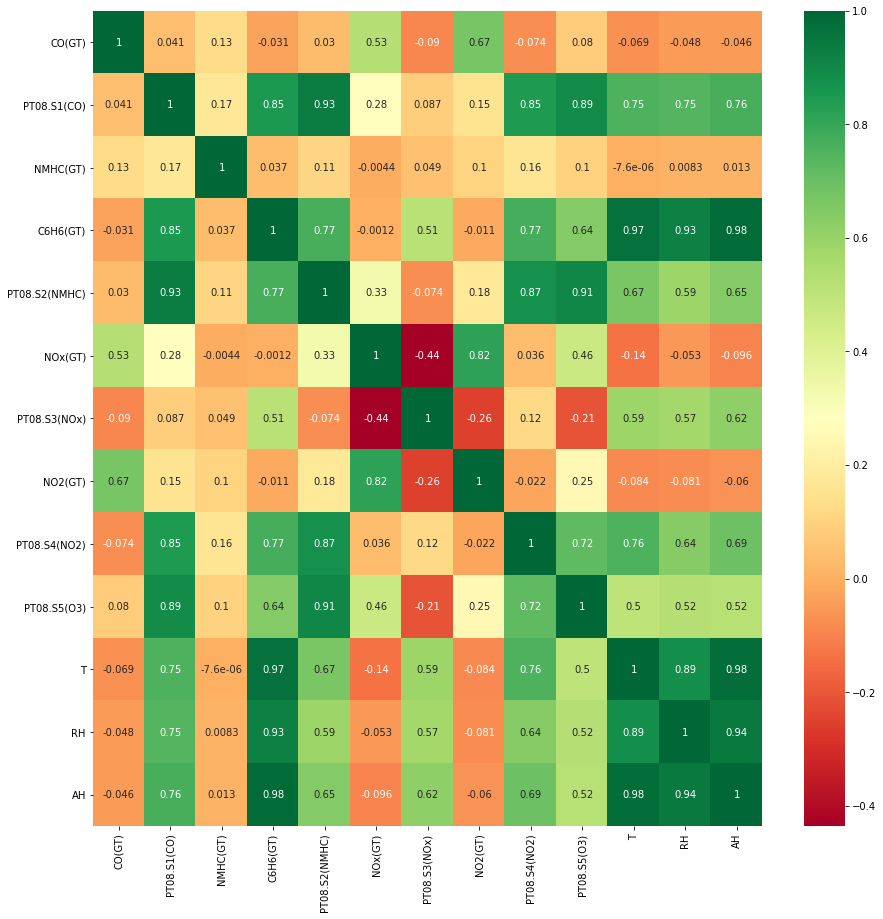

In [9]:
import seaborn as sbn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sbn.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [10]:
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [11]:
X = data.drop(['RH'], axis=1)
Y = data['RH']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## without tuning

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(45, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mean_squared_logarithmic_error, optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
165/165 [==============================] - 1s 3ms/step - loss: 4.0491 - val_loss: 0.2991
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 0.2034 - val_loss: 0.1960
Epoch 3/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1687 - val_loss: 0.1752
Epoch 4/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.1537
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 0.1289 - val_loss: 0.1295
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.1054 - val_loss: 0.1021
Epoch 7/50
165/165 [==============================] - 1s 4ms/step - loss: 0.0822 - val_loss: 0.0769
Epoch 8/50
165/165 [==============================] - 1s 4ms/step - loss: 0.0638 - val_loss: 0.0601
Epoch 9/50
165/165 [==============================] - 1s 4ms/step - loss: 0.0511 - val_loss: 0.0473
Epoch 10/50
165/165 [==============================] - 1s 4ms/step - loss: 0.0415 - val_loss: 0.0387

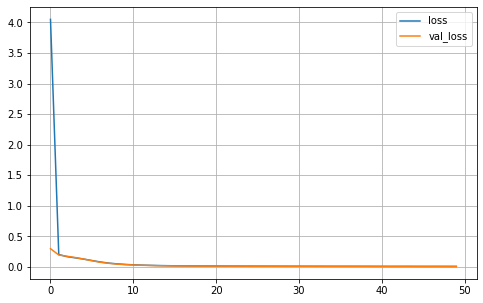

In [32]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [33]:
msle_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

74/74 [==============================] - 0s 2ms/step - loss: 0.0097


## tuning model using keras-tuner library

In [15]:
from kerastuner.tuners import RandomSearch    

In [16]:
def build_model(hp):
    model = tf.keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='msle',
        metrics=['msle'])
    return model

In [17]:
tuner = RandomSearch(
    build_model,
    objective='msle',
    max_trials=5,
    executions_per_trial=3,
    directory='AQI',
    project_name='Air_Quality_Index')

In [18]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [19]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 56s]
msle: 0.015598194052775701

Best msle So Far: 0.013316182419657707
Total elapsed time: 00h 03m 16s
INFO:tensorflow:Oracle triggered exit


In [20]:
best_model = tuner.get_best_models(num_models=1)[0]

In [21]:
loss, mse = best_model.evaluate(X_test, y_test)

74/74 [==============================] - 0s 3ms/step - loss: 0.0114 - msle: 0.0114


In [22]:
best_params = tuner.get_best_hyperparameters

In [23]:
tuner.results_summary()

Results summary
Results in AQI\Air_Quality_Index
Showing 10 best trials
Objective(name='msle', direction='min')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 480
learning_rate: 0.01
units_2: 384
units_3: 448
units_4: 480
units_5: 448
units_6: 32
units_7: 32
Score: 0.013316182419657707
Trial summary
Hyperparameters:
num_layers: 19
units_0: 416
units_1: 288
learning_rate: 0.0001
units_2: 448
units_3: 128
units_4: 64
units_5: 448
units_6: 384
units_7: 224
units_8: 512
units_9: 64
units_10: 64
units_11: 128
units_12: 192
units_13: 480
units_14: 160
units_15: 448
units_16: 192
units_17: 448
units_18: 288
Score: 0.015598194052775701
Trial summary
Hyperparameters:
num_layers: 12
units_0: 224
units_1: 352
learning_rate: 0.0001
units_2: 320
units_3: 256
units_4: 320
units_5: 480
units_6: 256
units_7: 288
units_8: 288
units_9: 64
units_10: 480
units_11: 416
units_12: 288
units_13: 32
units_14: 448
units_15: 480
units_16: 352
units_17: 416
units_18: 288
Score: 0.01921338712175

In [24]:
loss

0.011379783041775227

Trial summary
Hyperparameters:
num_layers: 6
units_0: 480
units_1: 192
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 4.812488285514216
loss
loss

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(480, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.msle, optimizer=tf.keras.optimizers.Adam())
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
165/165 [==============================] - 1s 5ms/step - loss: 1.5739 - val_loss: 0.1862
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.1351 - val_loss: 0.1065
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.0568 - val_loss: 0.0343
Epoch 4/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0245 - val_loss: 0.0220
Epoch 5/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0162 - val_loss: 0.0136
Epoch 6/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0136 - val_loss: 0.0144
Epoch 7/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0122 - val_loss: 0.0101
Epoch 8/50
165/165 [==============================] - 1s 7ms/step - loss: 0.0115 - val_loss: 0.0108
Epoch 9/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 10/50
165/165 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0089

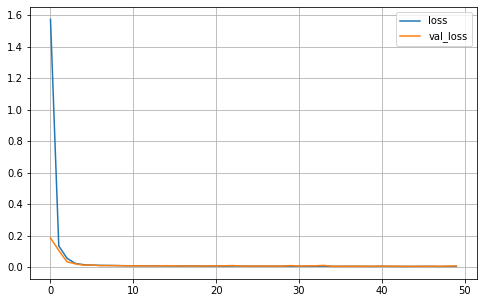

In [29]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [30]:
msle_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

74/74 [==============================] - 0s 2ms/step - loss: 0.0087


## Using checkpoint in model

In [ ]:
model.compile(loss="msle", optimizer='adam')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)